In [1]:
%%html
<style>
@media only screen and (min-width: 768px) {
    
    h1 {
        text-align: center;
    }

    body {
        margin-left: 25vw;
        margin-right: 25vw;
    }

    .lm-Widget.p-Widget.jupyter-matplotlib {
      display: flex;
      justify-content: center;
    }
    
}

.jp-Cell {
    # margin-top: 8vh;
    margin-bottom: 8vh;
}

img {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}
</style>

# 1 - Simple Harmonic Motion

**Prerequisites**:
- Elementary Calculus
- Knowledge of kinematic variables
- Newton's Laws (and elementary applications)

The simple harmonic oscillator is perhaps the first oscillator you will encounter. Oscillations represent a fundamentally different kind of motion where the force on the oscillating particle is often dependent on its displacment if not other factors.

Consider a block of mass $m$ attached to a spring with a stiffness constant $K$. What happens when you pull the block just a little bit to the right?

<p align="center">
    <img src="assets/spring.png" alt="Drawing" style="width: 300px;"/>
</p>

It is at this stage that we make a host of assumptions, namely:
- the spring obeys Hooke's law (i.e. the restoring force is proportional to the displacement)
- there are no resistive forces involved, from the spring or from the environment

So the net and only force acting on the block is the restoring force of the spring pulling it back and Hooke's law says it is of the form

$$ F_{net} = -Kx $$

By Newton's second law we know $F_{net} = ma$, giving us

$$m\frac{d^2 x}{dt^2} = -Kx$$ 

$$\frac{d^2 x}{dt^2} + \frac{K}{m}x = 0$$

Defining a new quantity $\omega = \sqrt{\frac{K}{m}}$ whose significance will soon become clear, our differential equation is

$$\frac{d^2 x}{dt^2} + \omega^2 x = 0$$

This is a rather complicated differential equation, but it can be solved nonetheless. Its general solution gives us the resultant motion of the block: 

$$x = A\sin (\omega t + \phi)$$

Before we can establish the physical significance of these quantities, take a moment to vary them in the following simulation and observe the changes.

Suggestions:
- Observe the apparent speed and maximum displacement of the particle
- Start with lower values of $\omega$

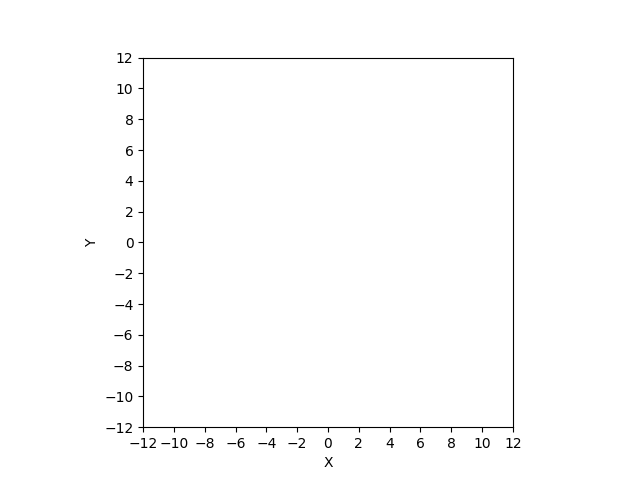

In [2]:
%matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib
import numpy as np
import ipywidgets as widgets
from matplotlib.patches import Circle,FancyArrow
import pylab, time

pylab.ion()


axS = widgets.FloatSlider(
    value=8,
    min=0,
    max=10.0,
    step=0.05,
    description='$A$',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

wxS = widgets.FloatSlider(
    value=0.5,
    min=0.1,
    max=2.0,
    step=0.1,
    description='$\omega$',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
pxS = widgets.IntSlider(
    value=0,
    min=0,
    max=360,
    step=30,
    description='$\phi^\circ$',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

vT = widgets.ToggleButtons(
    options=['On', 'Off'],
    description='Velocity Vector',
    disabled=False,
    tooltips=['Show velocity vector', "Don't show velocity vector"]
)

aT = widgets.ToggleButtons(
    options=['On', 'Off'],
    description='Acceleration Vector',
    disabled=False,
    tooltips=['Show acceleration vector', "Don't show acceleration vector"]
)

vrT = widgets.ToggleButtons(
    value="Off",
    options=['On', 'Off'],
    description='Velocity / Displacement',
    disabled=False,
    tooltips=['Graph velocity as a function of displacement', "Don't graph v(x)"]
)

arT = widgets.ToggleButtons(
    value="Off",
    options=['On', 'Off'],
    description='Acceleration / Displacement',
    disabled=False,
    tooltips=['Graph acceleration as a function of displacement', "Don't graph a(x)"]
)

class sim:
    
    def __init__(self):
        self.r = [0,0]
        self.v = [0,0]
        self.a = [0,0]
        self.t = 0
        self.dt = 0.1
        self.xr = []
        self.vr = []
        self.ar = []
        
    def step(self):
        self.t+= self.dt
        self.r = [axS.value*np.sin(wxS.value*self.t + pxS.value*np.pi/180) , 0]
        self.v = [axS.value*wxS.value*np.cos(wxS.value*self.t + pxS.value*np.pi/180) , 0]
        self.a = [-1*(wxS.value**2)*self.r[0] , 0]
        self.xr.append(self.r[0])
        self.vr.append(self.v[0])
        self.ar.append(self.a[0])
        

        
    def reset(self,arg):
        self.t = 0
        self.r = [axS.value*np.sin(pxS.value*np.pi/180),0]
        self.a = [-1*(wxS.value**2)*self.r[0] , 0]
        self.v = [axS.value*wxS.value*np.cos(pxS.value*np.pi/180) ,0]
        self.xr = []
        self.vr = []
        self.ar = []

fig = plt.figure()
nx = 12
ny = 12

plt.axis([-nx,nx,-ny,ny])
plt.xticks(np.arange(-nx, nx+2, 2))
plt.yticks(np.arange(-ny, ny+2, 2))
plt.xlabel("X")
plt.ylabel("Y")
ax = plt.gca()
ax.set_aspect(1)
world = sim()

vel_arr = FancyArrow(world.r[0],world.r[1],world.v[0],world.v[1],width=0.125,color="tab:green",zorder=-100)
acc_arr = FancyArrow(world.r[0],world.r[1],2*world.a[0],2*world.a[1],width=0.125,color="tab:red",zorder=-100,antialiased=True)
point = Circle((world.r[0],world.r[1]),0.25,color='k')
vel_plot, = ax.plot([],[],linewidth=0.75,c='green')
acc_plot, = ax.plot([],[],linewidth=0.75,c='red')

def init():
    ax.add_patch(point)
    ax.add_patch(vel_arr)
    ax.add_patch(acc_arr)
    
def animate(i,l,m):
    acc_arr.set(visible=False)
    vel_arr.set(visible=False)
    for child in plt.gca().get_children():
        if isinstance(child, matplotlib.text.Annotation):
            child.remove()
    world.step()
    point.center = (world.r[0],world.r[1])
    ax.annotate(f'({round(world.r[0],2)} , {round(world.r[1],2)})',(world.r[0],world.r[1]),(world.r[0]+1,world.r[1]-1))
    ax.annotate(f'$t$ = {round(world.t,1)} $s$ \n\n $v$ = {round(world.v[0],1)} $m/s$ \n\n $a$ = {round(world.a[0],1)} $m/s^2$',(world.r[0],world.r[1]),(nx+1,ny-5))
    if vT.value == 'On':
        vel_arr.set(visible=True)
        vel_arr.set_data(x=world.r[0],y=world.r[1],dx=world.v[0], dy=world.v[1])
    if aT.value == 'On':
        acc_arr.set(visible=True)
        acc_arr.set_data(x=world.r[0],y=world.r[1],dx=2*world.a[0], dy=2*world.a[1])
    if vrT.value == 'On':
        l.set_data(world.xr,world.vr)
    else:
        l.set_data([],[])
    if arT.value == 'On':
        m.set_data(world.xr,world.ar)
    else:
        m.set_data([],[])
        
anim = animation.FuncAnimation(fig, animate,
                               init_func=init, fargs=(vel_plot,acc_plot),
                               interval=50, blit=True)
plt.show()

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed',alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=8)

resetB = widgets.Button(description='Reset')
resetB.on_click(world.reset)

x_slider_panel = widgets.VBox([axS,wxS,pxS])
settings_panel = widgets.VBox([vT,aT])
graph_panel = widgets.VBox([vrT,arT])

[w.observe(world.reset) for w in [axS,wxS,pxS,arT,vrT]]
unitLabel = widgets.Label("Assume all quantities are in SI units")
tab_nest = widgets.Tab()
tab_nest.children = [widgets.VBox([widgets.HBox([x_slider_panel,resetB]),unitLabel]),
                     graph_panel,settings_panel]
tab_nest.set_title(0, 'Simulation')
tab_nest.set_title(1, 'Graphs')
tab_nest.set_title(2, 'Settings')
tab_nest


We know that that the displacement from the mean position is

$$x = A\sin(\omega t + \phi)$$

You may have noticed $A$ is related to the farthest the particle can get from the mean position; it is known as the amplitude.

We can see the motion repeats itself after some time. This is expected, after all, thats what oscillation means. Let us call that time period $T$. Since the motion repeats itself after a period $T$ we have

$$A\sin\big(\omega (t + T)\big) = A\sin(\omega t)$$

$$\sin(\omega t + \omega T) = \sin(\omega t)$$

We know the the sine function repeats itself after a phase of $2\pi$, so we conclude

$$\omega T = 2\pi$$

This gives us 

$$T = \frac{2\pi}{\omega}$$

## Questions

**1)** Differentiating the expression for displacement, we have the following expresssions for acceleration and velocity:

$$v(t) = \omega A \cos(\omega t + \phi)$$

$$a(t) = -\omega^2 A \sin(\omega t + \phi)$$

a. What is the maximum distance the particle can reach from the mean position?
    
b. Why does the particle then return to its mean position instead of continuing on its path?
    
c. What does it mean that $v$ has a cosine term while the displacement involves a sine term?

*Hint: Try enabling some settings from the "Graphs" panel.*

**2)** A particle perfoming SHM does not always have to start from the mean position. Given that the equation of motion is 

$$x = A\sin(\omega t + \phi)$$

a. Which variable decides the particle's starting position?
    
b. Why does it affect the starting position (Hint: Initially, $t=0$)
    
c. Is this quantity periodic? If so, what is the period and why? 

d. Does this quantity change the time period $T$ of oscillations and why?